In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes/pima-indians-diabetes.csv


## Import ML Libraries

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

## Loading Dataset

In [4]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes/pima-indians-diabetes.csv')

In [5]:
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

## Data Preprocessing

In [6]:
df.columns = columns

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df['Outcome'].value_counts()

Outcome
0    500
1    267
Name: count, dtype: int64

In [12]:
X = df.drop(columns='Outcome')
y = df['Outcome']

**Here, we need to scaling for more safe approach, because scale of values of Pregnancies much different from other values scale.**

In [13]:
scale = StandardScaler()

In [14]:
X = scale.fit_transform(X)
X

array([[-0.84372629, -1.12208597, -0.16024856, ..., -0.68372895,
        -0.36426474, -0.18894038],
       [ 1.23423997,  1.94447577, -0.26357823, ..., -1.10230105,
         0.60470064, -0.1037951 ],
       [-0.84372629, -0.99692019, -0.16024856, ..., -0.49346891,
        -0.91968415, -1.0403932 ],
       ...,
       [ 0.343683  ,  0.0044061 ,  0.14974046, ..., -0.73446496,
        -0.68423462, -0.27408566],
       [-0.84372629,  0.16086333, -0.47023757, ..., -0.23978884,
        -0.37030191,  1.17338414],
       [-0.84372629, -0.8717544 ,  0.04641078, ..., -0.20173684,
        -0.47293375, -0.87010264]])

In [15]:
# data is split in a stratified fashion, using this as the class labels because there is imbalance between both types of outocmes,
# So, using this both training and testing dataset will contain proportional number of both outcomes
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y)

In [16]:
y_train.value_counts()

Outcome
0    400
1    213
Name: count, dtype: int64

In [17]:
y_test.value_counts()

Outcome
0    100
1     54
Name: count, dtype: int64

**As we can observe that both train and testing dataset contain proportional number of both outcomes.**

In [18]:
X.shape

(767, 8)

## Training and Testing Data : Bagging Classifier

In [19]:
scores = cross_val_score(DecisionTreeClassifier(),X,y,cv=20)
scores

array([0.56410256, 0.69230769, 0.74358974, 0.76923077, 0.66666667,
       0.66666667, 0.61538462, 0.63157895, 0.63157895, 0.76315789,
       0.71052632, 0.71052632, 0.68421053, 0.78947368, 0.68421053,
       0.86842105, 0.65789474, 0.68421053, 0.65789474, 0.81578947])

In [20]:
scores.mean()

0.7003711201079622

In [21]:
bag_model = BaggingClassifier(
estimator=DecisionTreeClassifier(),
n_estimators=100,
max_samples=0.8, #The number of samples to draw from X to train each base estimator 
oob_score=True #OOB score is to use the observations that were not included in the training subset for each base model to evaluate its performance.
)
#The OOB score can serve as a useful estimate of the model's generalization performance without the need for a separate validation set.
# It is particularly helpful when you have a limited amount of data and want to make the most out of your training set.

In [22]:
bag_model.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True)

In [23]:
bag_model.oob_score_

0.7455138662316476

In [24]:
bag_model.score(X_test,y_test)

0.7402597402597403

In [25]:
scores = cross_val_score(bag_model,X,y,cv=20)
scores

array([0.61538462, 0.74358974, 0.79487179, 0.79487179, 0.79487179,
       0.66666667, 0.66666667, 0.68421053, 0.76315789, 0.84210526,
       0.78947368, 0.84210526, 0.71052632, 0.92105263, 0.68421053,
       0.89473684, 0.73684211, 0.71052632, 0.73684211, 0.86842105])

In [26]:
scores.mean()

0.7630566801619433

## Checking For PCA

In [27]:
df_corr = df.corr()

<Axes: >

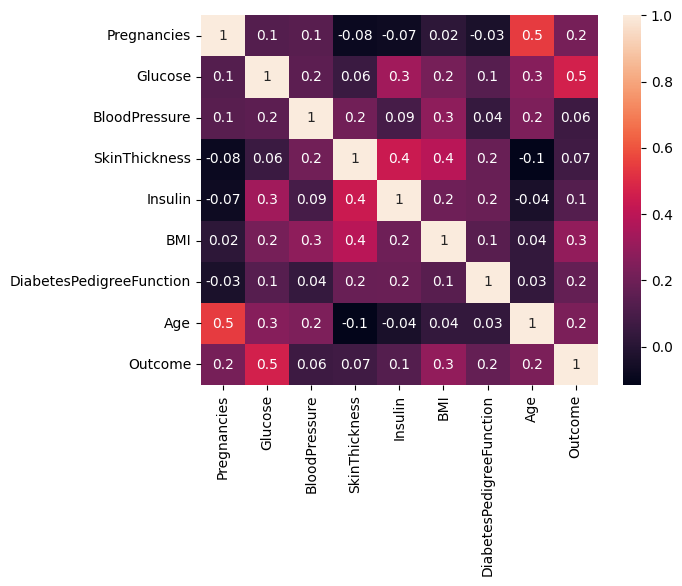

In [28]:
sns.heatmap(df_corr,annot = True,fmt='.1g')

**Since, features are poorly corelated to each other. So, PCA is not better option.**